In [39]:
#Importar biblioteca que usamos
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [42]:
from sklearn import preprocessing, model_selection,neighbors
#from sklearn.prepocessing import StandardScaler 

In [43]:
#from mlxtend.plotting import plot_decision_regions

# Importar a base de dados de indios_primas

In [44]:
dado = pd.read_table('indios_pima.txt')

mostrar as 5 primeira linha da base de dados

In [45]:
dado.head()

,NPreg,Plasma,Diast,Triceps,Serum,BMI,Pedig,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


mostrar algumas informações da base de dados

In [98]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NPreg    768 non-null    int64  
 1   Plasma   768 non-null    int64  
 2   Diast    768 non-null    int64  
 3   Triceps  768 non-null    int64  
 4   Serum    768 non-null    int64  
 5   BMI      768 non-null    float64
 6   Pedig    768 non-null    float64
 7   Age      768 non-null    int64  
 8   Class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
dado.describe()

,NPreg,Plasma,Diast,Triceps,Serum,BMI,Pedig,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Aplicar o modelo de Machine Learning: KNN
    
Antes de criar o modelo precisamos de definir quais colunas são de caracteristica e qual é que queremos prever, o seja vamos definir as colunas features(X) e targets(y)

In [46]:
X=np.array(dado.drop(['Class'],1))
y=np.array(dado['Class'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_3212\3896250399.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(dado.drop(['Class'],1))


Vamos separar a base de dados em duas parte ( dataset de treino e de teste)

In [63]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=0)

Importamos a biblioteca sklearn para chamar a função neighbordsClassifier que e atribui-lo a variavel clf e definimos o nosso modelo KNN

In [67]:
from sklearn.metrics import classification_report

In [69]:
clf=neighbors.KNeighborsClassifier(n_neighbors=19,metric='euclidean')

Vamos treinar o nosso modelo com as variaveis definidas

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [ ]:
# Normalizar os valores
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X.test)

Vamos testar o nosso modelo

In [75]:
a=clf.score(X_test,y_test)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [80]:
res=a*100
print(f'{res}%')

72.72727272727273%


Para termos uma melhor percepção do comportamento do classi9cador vamos agora
apresentar a matriz de confusão.

In [81]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[141  16]
 [ 41  33]]


Para os perfecionistas, ou para publicação, uma versão mais estilizada...

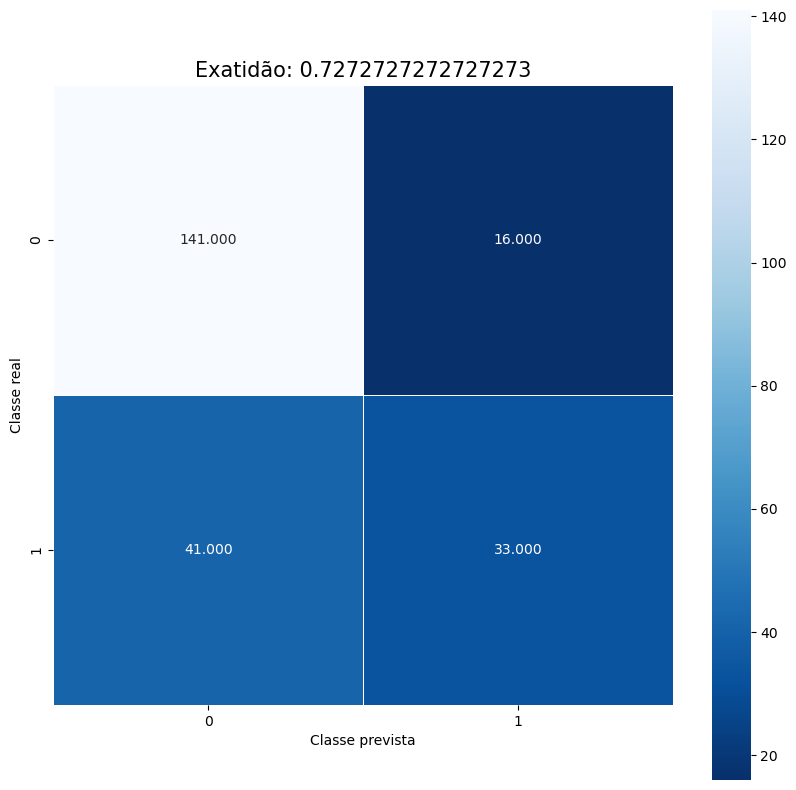

In [84]:
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Classe real');
plt.xlabel('Classe prevista');
all_sample_title = 'Exatidão: {0}'.format(a)
plt.title(all_sample_title, size = 15);

In [85]:
#from sklearn.prepocessing import StandardScaler 

In [86]:
y_pred = clf.predict(X_train)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Calcular a exatidão ou acurácia (accuracy) do classificador com KNN

In [88]:
from sklearn.metrics import accuracy_score
Acc = accuracy_score(y_train, y_pred)
print('Exatidão no conjunto de treino: {:.2f}'.format(Acc))

Exatidão no conjunto de treino: 0.77


Testar com os novos dados dos pacientes

In [94]:
#Dados de duas peças de fruta
Xnew = [[6,150,70,30,0,33,600,50],[5,170,70,30,0,31,620,52]]
ynew = clf.predict(Xnew)
print(ynew)

[1 1]


C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Mostar o resultado da previsão do paciente

In [97]:
if ynew[1] ==1:
    print('Tem inicio de diabete, então pertence a classe A ou 1')
else:
    print('Não tem ainda nenhum sinal de diabete, então a classe B ou 0')

Tem inicio de diabete, então pertence a classe A ou 1
